In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [3]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# dropped variables appearing to be irrelevant
lead = lead.drop(['Lead Number', 'Lead Origin', 'Last Activity', 'How did you hear about X Education', 'Country', 'Update me on Supply Chain Content','Lead Quality','Asymmetrique Activity Score','Asymmetrique Profile Score','I agree to pay the amount through cheque','Last Notable Activity'], 1)
lead.head()

,Prospect ID,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,No,No,0,0.0,0,0.0,Select,Unemployed,...,No,No,No,Interested in other courses,No,Select,Select,02.Medium,02.Medium,No
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,No,No,0,5.0,674,2.5,Select,Unemployed,...,No,No,No,Ringing,No,Select,Select,02.Medium,02.Medium,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,...,No,No,No,Will revert after reading the email,No,Potential Lead,Mumbai,02.Medium,01.High,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,...,No,No,No,Ringing,No,Select,Mumbai,02.Medium,01.High,No
4,3256f628-e534-4826-9d63-4a8b88782852,Google,No,No,1,2.0,1428,1.0,Select,Unemployed,...,No,No,No,Will revert after reading the email,No,Select,Mumbai,02.Medium,01.High,No


In [5]:
# Conversion of Yes/No to 1/0
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Get updates on DM Content', 'A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
lead[varlist] = lead[varlist].apply(binary_map)

In [6]:
#Dropped DND rows and non-eligible individuals 
lead.drop(lead.loc[lead['Do Not Email'] == 1].index, inplace=True)

lead.shape

(8506, 26)

In [7]:
lead.drop(lead.loc[lead['Do Not Call'] == 1].index, inplace=True)

lead.shape

(8504, 26)

In [8]:
lead.drop(lead.loc[lead['Tags'] == 'Lost to EINS'].index, inplace=True)
lead.shape

(8332, 26)

In [9]:
lead.drop(lead.loc[lead['Tags'] == 'Lost to Others'].index, inplace=True)
lead.drop(lead.loc[lead['Tags'] == 'Diploma holder (Not Eligible)'].index, inplace=True)
lead.drop(lead.loc[lead['Tags'] == 'invalid number'].index, inplace=True)
lead.drop(lead.loc[lead['Tags'] == 'Not doing further education'].index, inplace=True)
lead.drop(lead.loc[lead['Tags'] == 'Recognition issue (DEC approval)'].index, inplace=True)
lead.drop(lead.loc[lead['Tags'] == 'wrong number given'].index, inplace=True)

lead.shape

(8081, 26)

In [10]:
lead = lead.drop(['Tags', 'Do Not Email', 'Do Not Call'], axis = 1)

In [11]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8081 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8081 non-null   object 
 1   Lead Source                                    8059 non-null   object 
 2   Converted                                      8081 non-null   int64  
 3   TotalVisits                                    7956 non-null   float64
 4   Total Time Spent on Website                    8081 non-null   int64  
 5   Page Views Per Visit                           7956 non-null   float64
 6   Specialization                                 6753 non-null   object 
 7   What is your current occupation                5707 non-null   object 
 8   What matters most to you in choosing a course  5700 non-null   object 
 9   Search                                         8081 

In [12]:
lead.head()

,Prospect ID,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,0,0.0,0,0.0,Select,Unemployed,Better Career Prospects,0,...,0,0,0,0,0,Select,Select,02.Medium,02.Medium,0
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,0,5.0,674,2.5,Select,Unemployed,Better Career Prospects,0,...,0,0,0,0,0,Select,Select,02.Medium,02.Medium,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,0,...,0,0,0,0,0,Potential Lead,Mumbai,02.Medium,01.High,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,0,...,0,0,0,0,0,Select,Mumbai,02.Medium,01.High,0
4,3256f628-e534-4826-9d63-4a8b88782852,Google,1,2.0,1428,1.0,Select,Unemployed,Better Career Prospects,0,...,0,0,0,0,0,Select,Mumbai,02.Medium,01.High,0


In [13]:
lead.isnull().sum()

Prospect ID                                         0
Lead Source                                        22
Converted                                           0
TotalVisits                                       125
Total Time Spent on Website                         0
Page Views Per Visit                              125
Specialization                                   1328
What is your current occupation                  2374
What matters most to you in choosing a course    2381
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Get updates on DM Content                           0
Lead Profile                

In [14]:
lead[['Number_AAI','Rating_AAI']] = lead['Asymmetrique Activity Index'].str.split('.',expand=True)

In [15]:
lead.head()

,Prospect ID,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,...,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Number_AAI,Rating_AAI
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,0,0.0,0,0.0,Select,Unemployed,Better Career Prospects,0,...,0,0,0,Select,Select,02.Medium,02.Medium,0,02,Medium
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,0,5.0,674,2.5,Select,Unemployed,Better Career Prospects,0,...,0,0,0,Select,Select,02.Medium,02.Medium,0,02,Medium
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,0,...,0,0,0,Potential Lead,Mumbai,02.Medium,01.High,1,02,Medium
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,0,...,0,0,0,Select,Mumbai,02.Medium,01.High,0,02,Medium
4,3256f628-e534-4826-9d63-4a8b88782852,Google,1,2.0,1428,1.0,Select,Unemployed,Better Career Prospects,0,...,0,0,0,Select,Mumbai,02.Medium,01.High,0,02,Medium


In [16]:
lead[['Number_API','Rating_API']] = lead['Asymmetrique Profile Index'].str.split('.',expand=True)

In [17]:
lead.head()

,Prospect ID,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Number_AAI,Rating_AAI,Number_API,Rating_API
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,0,0.0,0,0.0,Select,Unemployed,Better Career Prospects,0,...,0,Select,Select,02.Medium,02.Medium,0,02,Medium,02,Medium
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,0,5.0,674,2.5,Select,Unemployed,Better Career Prospects,0,...,0,Select,Select,02.Medium,02.Medium,0,02,Medium,02,Medium
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,0,...,0,Potential Lead,Mumbai,02.Medium,01.High,1,02,Medium,01,High
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,0,...,0,Select,Mumbai,02.Medium,01.High,0,02,Medium,01,High
4,3256f628-e534-4826-9d63-4a8b88782852,Google,1,2.0,1428,1.0,Select,Unemployed,Better Career Prospects,0,...,0,Select,Mumbai,02.Medium,01.High,0,02,Medium,01,High


In [18]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Number_AAI', 'Number_API'], 1)

In [19]:
lead.isnull().sum()

Prospect ID                                         0
Lead Source                                        22
Converted                                           0
TotalVisits                                       125
Total Time Spent on Website                         0
Page Views Per Visit                              125
Specialization                                   1328
What is your current occupation                  2374
What matters most to you in choosing a course    2381
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Get updates on DM Content                           0
Lead Profile                

In [20]:
lead['Lead Source'].value_counts(dropna=False)

Google               2610
Direct Traffic       2046
Olark Chat           1605
Organic Search        983
Reference             498
Welingak Website      126
Referral Sites        115
Facebook               53
NaN                    22
bing                    6
google                  4
Click2call              4
Live Chat               2
Social Media            2
blog                    1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [21]:
#filled the na values in Lead Source with Mode - Google
lead['Lead Source'] = lead['Lead Source'].fillna('Google')
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [22]:
lead['TotalVisits'].value_counts(dropna=False)

0.0      1993
2.0      1438
3.0      1156
4.0      1010
5.0       685
6.0       408
7.0       266
1.0       265
8.0       190
9.0       146
NaN       125
10.0       98
11.0       75
13.0       45
12.0       40
14.0       34
16.0       18
17.0       14
15.0       14
18.0       12
20.0       10
19.0        6
21.0        6
24.0        5
27.0        4
23.0        4
25.0        3
22.0        2
29.0        2
26.0        2
32.0        1
251.0       1
28.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [23]:
#filled the na values in TotalVisits with Mode - 0
lead['TotalVisits'] = lead['TotalVisits'].fillna(0)

In [24]:
lead['Page Views Per Visit'].value_counts(dropna=False)

0.00     1993
2.00     1533
3.00     1062
4.00      807
1.00      505
         ... 
2.38        1
6.33        1
1.31        1
16.00       1
2.63        1
Name: Page Views Per Visit, Length: 98, dtype: int64

In [25]:
#filled the na values in Page Views Per Visit with Mode - 0
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(0)

In [26]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              4828
NaN                     2374
Working Professional     659
Student                  188
Other                     14
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('NA')

In [28]:
lead['What is your current occupation'].value_counts()

Unemployed              4828
NA                      2374
Working Professional     659
Student                  188
Other                     14
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      5698
NaN                          2381
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [31]:
lead['Rating_AAI'].value_counts()

Medium    3402
High       754
Low        272
Name: Rating_AAI, dtype: int64

In [32]:
#null values in Rating_AAI and Rating_API
3653/8081

0.4520480138596708

In [33]:
lead = lead.drop(['Rating_AAI', 'Rating_API'], 1)

In [34]:
lead.isnull().sum()

Prospect ID                                         0
Lead Source                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Specialization                                   1328
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Get updates on DM Content                           0
Lead Profile                

In [35]:
lead['City'].value_counts(dropna=False)

Mumbai                         2768
Select                         2012
NaN                            1316
Thane & Outskirts               650
Other Cities                    583
Other Cities of Maharashtra     395
Other Metro Cities              305
Tier II Cities                   52
Name: City, dtype: int64

In [36]:
#total null values in city are
(2012+1316)/8081

0.411830219032298

In [37]:
lead['City'] = lead['City'].replace(['Select'], 'Unknown')
lead['City'] = lead['City'].fillna('Unknown')

In [38]:
lead['City'].value_counts(dropna=False)

Unknown                        3328
Mumbai                         2768
Thane & Outskirts               650
Other Cities                    583
Other Cities of Maharashtra     395
Other Metro Cities              305
Tier II Cities                   52
Name: City, dtype: int64

In [39]:
lead['Specialization'].value_counts(dropna=False)

Select                               1726
NaN                                  1328
Finance Management                    839
Human Resource Management             760
Marketing Management                  736
Operations Management                 438
Business Administration               350
Banking, Investment And Insurance     309
Supply Chain Management               301
IT Projects Management                280
Media and Advertising                 169
Travel and Tourism                    158
International Business                158
Healthcare Management                 132
Hospitality Management                 99
E-COMMERCE                             89
Retail Management                      80
Rural and Agribusiness                 59
E-Business                             44
Services Excellence                    26
Name: Specialization, dtype: int64

In [40]:
#total null values in specialization are
(1726+1328)/8081

0.3779235243162975

In [41]:
lead['Specialization'] = lead['Specialization'].replace(['Retail Management','Hospitality Management', 'Healthcare Management', 'IT Projects Management', 'Supply Chain Management', 'Operations Management', 'Marketing Management', 'Human Resource Management', 'Finance Management'], 'Management')

In [42]:
lead['Specialization'] = lead['Specialization'].replace(['Select'],'Unknown')
lead['Specialization'] = lead['Specialization'].fillna('Unknown')

In [43]:
lead['Specialization'].value_counts()

Management                           3665
Unknown                              3054
Business Administration               350
Banking, Investment And Insurance     309
Media and Advertising                 169
International Business                158
Travel and Tourism                    158
E-COMMERCE                             89
Rural and Agribusiness                 59
E-Business                             44
Services Excellence                    26
Name: Specialization, dtype: int64

In [44]:
lead['Lead Profile'].value_counts(dropna=False)

Select                         3585
NaN                            2381
Potential Lead                 1481
Other Leads                     395
Student of SomeSchool           197
Lateral Student                  23
Dual Specialization Student      19
Name: Lead Profile, dtype: int64

In [45]:
#total null values in lead Profile are
(3585+2381)/8081

0.7382749659695582

In [46]:
lead = lead.drop(['Lead Profile'], 1)

In [47]:
lead.head()

,Prospect ID,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,Unknown,0
1,2a272436-5132-4136-86fa-dcc88c88f482,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,Unknown,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,Mumbai,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,Mumbai,0
4,3256f628-e534-4826-9d63-4a8b88782852,Google,1,2.0,1428,1.0,Unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,Mumbai,0


In [48]:
# dummy variable creation

lead_dummy = pd.get_dummies(lead[['Lead Source','Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'City']], drop_first=True)

In [49]:
lead = pd.concat([lead, lead_dummy], axis=1)

In [50]:
lead = lead.drop(['Lead Source','Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'City'],1)

In [51]:
lead.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [52]:
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
count,8081.000000,8081.000000,8081.000000,8081.000000,8081.000000,8081.0,8081.000000,8081.000000,8081.000000,8081.000000,...,8081.000000,8081.000000,8081.000000,8081.000000,8081.000000,8081.000000,8081.000000,8081.000000,8081.000000,8081.000000
mean,0.404900,3.328796,493.497711,2.302345,0.001732,0.0,0.000247,0.000124,0.000124,0.000495,...,0.597451,0.081549,0.000124,0.000124,0.072145,0.048880,0.037743,0.080436,0.006435,0.411830
std,0.490903,4.417721,552.848214,2.081442,0.041589,0.0,0.015731,0.011124,0.011124,0.022244,...,0.490442,0.273694,0.011124,0.011124,0.258743,0.215631,0.190585,0.271983,0.079964,0.492195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,251.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,952.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,1.000000,7.000000,1387.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,9.000000,1563.000000,6.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
99%,1.000000,16.000000,1841.400000,9.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


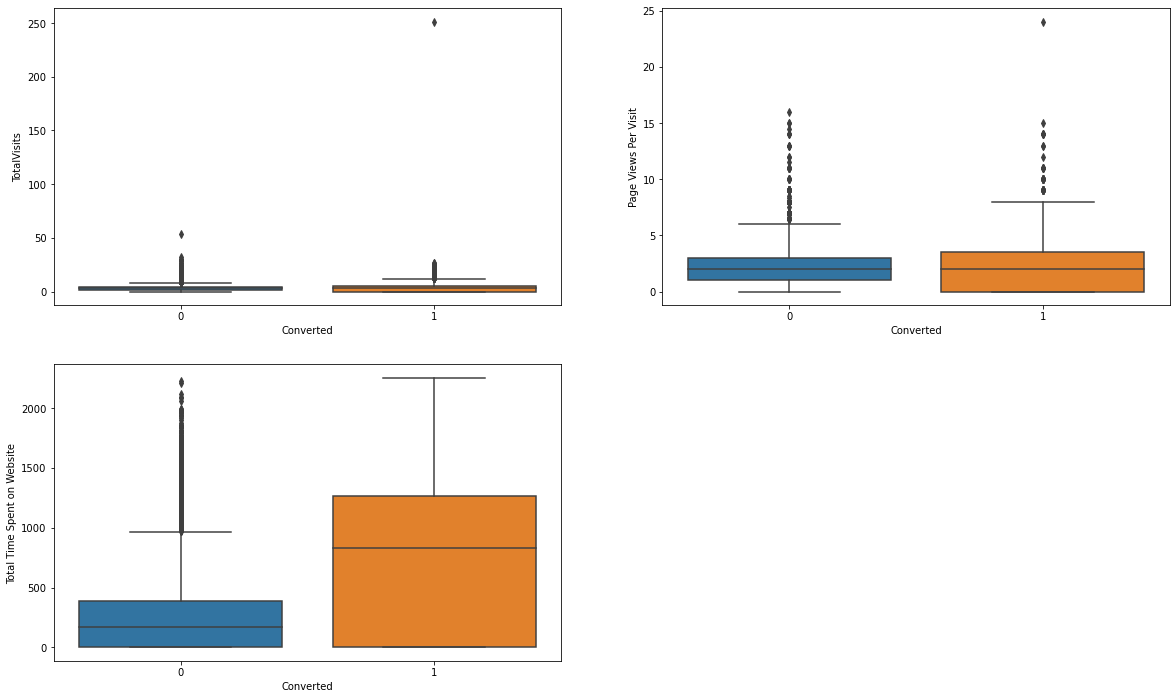

In [53]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = lead)
plt.subplot(2,2,2)
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = lead)
plt.subplot(2,2,3)
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = lead)
plt.show()

In [54]:
lead.sort_values(by = 'TotalVisits', ascending = False)
lead.drop(6102, axis=0,inplace=True)

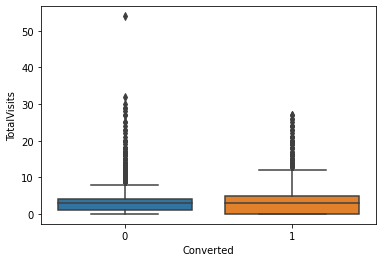

In [55]:
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = lead)
plt.show()

In [56]:
lead.sort_values(by = 'Page Views Per Visit', ascending = False)
lead.drop(6805, axis=0,inplace=True)

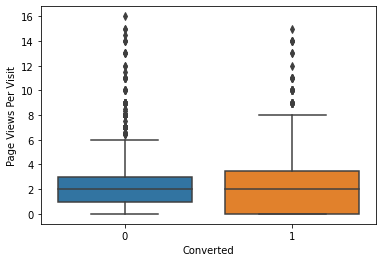

In [57]:
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = lead)
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X = lead.drop(['Converted', 'Prospect ID'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
0,0.0,0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2.0,1532,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
1604,-0.956043,-0.889398,-1.114033,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
276,0.201711,-0.477114,0.818905,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4936,-0.377166,-0.281822,-0.147564,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2957,0.201711,-0.809835,0.818905,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7915,-0.087727,1.853737,0.335671,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [63]:
### Checking the Conversion Rate
Convert = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Convert

40.475306349795765

In [64]:
import statsmodels.api as sm

In [65]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5655
Model:                            GLM   Df Residuals:                     5607
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 11 Nov 2021   Deviance:                   1.6615e+05
Time:                        11:56:22   Pearson chi2:                 8.12e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -6.245e+14   5.64e+07  -1.11e+07      0.000   -6.24e+14   -6.24e+14
TotalVisits                                                             -1.506e+14   1.29e+06  -1.17e+08      0.000   -1.51e+14   -1.51e+14
Total Time Spent on Website                                              7.036e+14   1.01e+06   6.93e+08      0.000    7.04e+14    7.04e+14
Page Views Per Visit                                                     8.383e+13   1.44e+06   5.82e+07      0.000    8.38e+13    8.38e+13
Search                                                                  -9.196e+14   2.25e+07  -4.08e+07      0.000    -9.2e+14    -9.2e+14
Magazine                                                                   54.3459   1.32e-06   4.11e+07      0.000      54.346      54.346
Newspaper Article                                                        5.312e+15   6.73e+07   7.89e+07      0.000    5.31e+15    5.31e+15
X Education Forums                                                      -9.094e+15   1.13e+08  -8.08e+07      0.000   -9.09e+15   -9.09e+15
Newspaper                                                                -1.89e+15   6.74e+07  -2.81e+07      0.000   -1.89e+15   -1.89e+15
Digital Advertisement                                                   -8.113e+14   4.76e+07   -1.7e+07      0.000   -8.11e+14   -8.11e+14
Through Recommendations                                                  6.548e+13   3.55e+07   1.85e+06      0.000    6.55e+13    6.55e+13
Receive More Updates About Our Courses                                    -44.6058   6.77e-07  -6.59e+07      0.000     -44.606     -44.606
Get updates on DM Content                                                -171.9891   2.04e-06  -8.44e+07      0.000    -171.989    -171.989
A free copy of Mastering The Interview                                   1.296e+14   3.01e+06   4.31e+07      0.000     1.3e+14     1.3e+14
Lead Source_Direct Traffic                                               -5.06e+14   4.76e+07  -1.06e+07      0.000   -5.06e+14   -5.06e+14
Lead Source_Facebook                                                    -9.408e+14   4.88e+07  -1.93e+07      0.000   -9.41e+14   -9.41e+14
Lead Source_Google                                                      -1.137e+15   4.75e+07  -2.39e+07      0.000   -1.14e+15   -1.14e+15
Lead Source_Live Chat                                                    9.306e+13   6.72e+07   1.39e+06      0.000    9.31e+13    9.31e+13
Lead Source_NC_EDM                                                       3.368e+15   8.22e+07   4.09e+07      0.000    3.37e+15    3.37e+15
Lea

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [67]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Search', False, 32),
 ('Magazine', False, 38),
 ('Newspaper Article', False, 25),
 ('X Education Forums', False, 20),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 27),
 ('Through Recommendations', False, 28),
 ('Receive More Updates About Our Courses', False, 35),
 ('Get updates on DM Content', False, 39),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Olark Chat', False, 33),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 6),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Get updates on DM Content', 'A free copy of Mastering The Interview',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_welearnblog_Home',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Specialization_Unknown',
       'What is your current occupation_Other',
       'What is your current 

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5655
Model:                            GLM   Df Residuals:                     5639
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.3
Date:                Thu, 11 Nov 2021   Deviance:                       5160.6
Time:                        11:56:28   Pearson chi2:                 6.32e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.3213      0.087      3.688      0.000       0.151       0.492
Total Time Spent on Website                                                 1.0808      0.041     26.337      0.000       1.000       1.161
Newspaper                                                                 -24.2756   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Direct Traffic                                                 -1.1918      0.114    -10.416      0.000      -1.416      -0.968
Lead Source_Facebook                                                       -0.6741      0.412     -1.636      0.102      -1.482       0.133
Lead Source_Google                                                         -0.7867      0.107     -7.384      0.000      -0.996      -0.578
Lead Source_Live Chat                                                      23.2060   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_Organic Search                                                 -0.7649      0.129     -5.950      0.000      -1.017      -0.513
Lead Source_Reference                                                       2.5272      0.236     10.695      0.000       2.064       2.990
Lead Source_Referral Sites                                                 -1.6257      0.350     -4.650      0.000      -2.311      -0.940
Lead Source_Welingak Website                                                4.9667      1.010      4.920      0.000       2.988       6.945
What is your current occupation_Housewife                                  22.1476    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
What is your current occupation_NA                                         -1.5449      0.088    -17.506      0.000      -1.718      -1.372
What is your current occupation_Working Professional                        2.6448      0.201     13.157      0.000       2.251       3.039
What matters most to you in choosing a course_Flexibility & Convenience   -27.6414   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
City_Tier II Cities                                                         1.0169      0.431      2.357      0.018       0.171       1.862
===========================================================================================================================================
"""

In [72]:
col1=col.drop(['Newspaper','Lead Source_Facebook','City_Tier II Cities','What matters most to you in choosing a course_Flexibility & Convenience', 'Lead Source_Live Chat', 'What is your current occupation_Housewife' ])

In [73]:
X_train_sm2 = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5655
Model:                            GLM   Df Residuals:                     5645
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.0
Date:                Thu, 11 Nov 2021   Deviance:                       5195.9
Time:                        11:56:28   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2970      0.085      3.481      0.000       0.130       0.464
Total Time Spent on Website                              1.0727      0.041     26.270      0.000       0.993       1.153
Lead Source_Direct Traffic                              -1.1473      0.112    -10.200      0.000      -1.368      -0.927
Lead Source_Google                                      -0.7522      0.105     -7.167      0.000      -0.958      -0.546
Lead Source_Organic Search                              -0.7227      0.127     -5.691      0.000      -0.972      -0.474
Lead Source_Reference                                    2.5134      0.232     10.849      0.000       2.059       2.967
Lead Source_Referral Sites                              -1.5974      0.348     -4.586      0.000      -2.280      -0.915
Lead Source_Welingak Website                             4.9842      1.009      4.938      0.000       3.006       6.963
What is your current occupation_NA                      -1.5411      0.088    -17.514      0.000      -1.714      -1.369
What is your current occupation_Working Professional     2.6018      0.198     13.136      0.000       2.214       2.990
========================================================================================================================
"""

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.62
3,Lead Source_Google,2.05
2,Lead Source_Direct Traffic,1.91
4,Lead Source_Organic Search,1.56
5,Lead Source_Reference,1.35
1,Total Time Spent on Website,1.26
8,What is your current occupation_NA,1.11
9,What is your current occupation_Working Profes...,1.11
7,Lead Source_Welingak Website,1.08
6,Lead Source_Referral Sites,1.06


In [74]:
y_train_pred = res.predict(X_train_sm2)
y_train_pred[:10]

1604    0.099920
276     0.275496
4936    0.319205
2957    0.036967
7915    0.976797
5072    0.099920
7824    0.191002
1469    0.505235
7556    0.202801
3527    0.393290
dtype: float64

In [75]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09991984, 0.27549607, 0.3192047 , 0.03696708, 0.97679719,
       0.09991984, 0.19100182, 0.50523474, 0.20280117, 0.39329001])

In [76]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID
0,0,0.099920,1604
1,1,0.275496,276
2,0,0.319205,4936
3,0,0.036967,2957
4,1,0.976797,7915


In [77]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [78]:
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted
0,0,0.099920,1604,0
1,1,0.275496,276,0
2,0,0.319205,4936,0
3,0,0.036967,2957,0
4,1,0.976797,7915,1


In [79]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[2969  364]
 [ 791 1531]]


In [80]:
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.7957559681697612


In [81]:
## ROC Curve


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

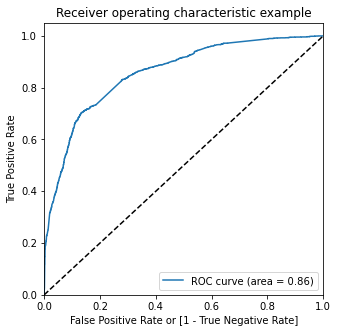

In [83]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [84]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.099920,1604,0,1,0,0,0,0,0,0,0,0,0
1,1,0.275496,276,0,1,1,1,0,0,0,0,0,0,0
2,0,0.319205,4936,0,1,1,1,1,0,0,0,0,0,0
3,0,0.036967,2957,0,1,0,0,0,0,0,0,0,0,0
4,1,0.976797,7915,1,1,1,1,1,1,1,1,1,1,1


In [85]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.410610  1.000000  0.000000
0.1   0.1  0.600884  0.972438  0.342034
0.2   0.2  0.657825  0.929802  0.468347
0.3   0.3  0.752785  0.850129  0.684968
0.4   0.4  0.797347  0.710164  0.858086
0.5   0.5  0.795756  0.659345  0.890789
0.6   0.6  0.777896  0.588717  0.909691
0.7   0.7  0.752962  0.496124  0.931893
0.8   0.8  0.725729  0.387166  0.961596
0.9   0.9  0.673917  0.217485  0.991899


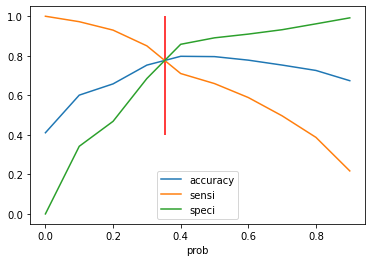

In [86]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.354, ymax=1, ymin=0.4, colors="r", linestyles="-")
plt.show()

In [87]:
#From the curve above, 0.354 is the optimum point to take it as a cutoff probability

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.099920,1604,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.275496,276,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.319205,4936,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.036967,2957,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.976797,7915,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7527851458885941

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[2283, 1050],
       [ 348, 1974]], dtype=int64)

In [91]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [92]:
#Sensitivity
TP / float(TP+FN)

0.8501291989664083

In [93]:
# Specificity
TN / float(TN+FP)

0.684968496849685

In [94]:
# False postive rate
print(FP/ float(TN+FP))

0.31503150315031503


In [95]:
# Positive predictive value
print (TP / float(TP+FP))

0.6527777777777778


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8677309007981756


In [101]:
from sklearn.metrics import precision_score, recall_score

In [103]:
# Precision
precision_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.807915567282322

In [104]:
# Recall
recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.6593453919035315

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
y_train_pred_final.Convert, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 5650    1
 5651    0
 5652    1
 5653    0
 5654    0
 Name: Convert, Length: 5655, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 5650    0
 5651    1
 5652    0
 5653    0
 5654    1
 Name: predicted, Length: 5655, dtype: int64)

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

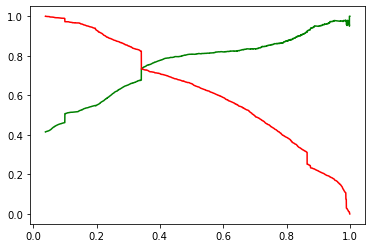

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [111]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [115]:
X_test = X_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_NA,What is your current occupation_Working Professional
3532,1.794065,1,0,0,0,0,0,0,1
4357,-0.889398,0,0,0,0,0,0,1,0
3743,0.251616,0,1,0,0,0,0,1,0
3983,1.864587,1,0,0,0,0,0,0,1
8934,-0.167901,0,1,0,0,0,0,0,0


In [116]:
X_test_sm = sm.add_constant(X_test)

In [117]:
y_test_pred = res.predict(X_test_sm)

In [118]:
y_test_pred[:10]

3532    0.975301
4357    0.099920
3743    0.151057
3983    0.977060
8934    0.346326
1310    0.773608
3768    0.099920
6856    0.523879
5606    0.193714
1440    0.084710
dtype: float64

In [119]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [120]:
y_pred_1.head()

,0
3532,0.975301
4357,0.099920
3743,0.151057
3983,0.977060
8934,0.346326


In [121]:
y_test_df = pd.DataFrame(y_test)

In [122]:
y_test_df['Prospect ID'] = y_test_df.index

In [123]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [124]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [125]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,3532,0.975301
1,0,4357,0.099920
2,0,3743,0.151057
3,1,3983,0.977060
4,1,8934,0.346326


In [126]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [129]:
y_pred_final.head()

,Converted,Prospect ID,Convert_Prob
0,1,3532,0.975301
1,0,4357,0.099920
2,0,3743,0.151057
3,1,3983,0.977060
4,1,8934,0.346326


In [137]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.345 else 0)

In [138]:
y_pred_final.head()

,Converted,Prospect ID,Convert_Prob,final_predicted
0,1,3532,0.975301,1
1,0,4357,0.099920,0
2,0,3743,0.151057,0
3,1,3983,0.977060,1
4,1,8934,0.346326,1


In [140]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7916666666666666

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1198,  278],
       [ 227,  721]], dtype=int64)

In [144]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [145]:
# Sensitivity
TP / float(TP+FN)

0.760548523206751

In [146]:
# Specificity
TN / float(TN+FP)

0.8116531165311653